In [2]:
from pyspark.sql import SparkSession 

sc = SparkSession.builder.appName("Visualizando").config("spark.driver.memory", "8g").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/18 13:38:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
import pyspark.sql.functions as F

DATA_PATH = "/app/data/"
input_file = DATA_PATH+"dados_log_urna/" 

df = sc.read.parquet(input_file)

df.show()

+--------------------+----------+-------------------+------------------+---------+--------------+---------------+---------------+----------------+---------------+
|             arquivo|id_eleitor|               data|         descricao|Municipio|Zona_Eleitoral|Secao_Eleitoral|erros_ate_agora|sum(erros_tecla)|tempo(segundos)|
+--------------------+----------+-------------------+------------------+---------+--------------+---------------+---------------+----------------+---------------+
|file:///app/data/...|        11|2022-10-02 08:42:46|  Deputado Federal|    16004|            21|             16|              0|               0|             28|
|file:///app/data/...|        11|2022-10-02 08:43:04| Deputado Estadual|    16004|            21|             16|              0|               0|             18|
|file:///app/data/...|        11|2022-10-02 08:43:16|           Senador|    16004|            21|             16|              0|               0|             12|
|file:///app/data/...|

In [4]:
df.sort(F.desc("sum(erros_tecla)")).show()

+--------------------+----------+-------------------+------------------+---------+--------------+---------------+---------------+----------------+---------------+
|             arquivo|id_eleitor|               data|         descricao|Municipio|Zona_Eleitoral|Secao_Eleitoral|erros_ate_agora|sum(erros_tecla)|tempo(segundos)|
+--------------------+----------+-------------------+------------------+---------+--------------+---------------+---------------+----------------+---------------+
|file:///app/data/...|        22|2022-10-02 09:33:05|        Governador|    17817|            12|            175|            480|             482|            299|
|file:///app/data/...|        22|2022-10-02 09:15:47|  Deputado Federal|    17817|            12|            175|             59|             482|            311|
|file:///app/data/...|        22|2022-10-02 09:21:35| Deputado Estadual|    17817|            12|            175|            168|             482|            348|
|file:///app/data/...|

In [5]:
max_values = df.groupBy("arquivo", "id_eleitor").max("sum(erros_tecla)")
max_values.show()

+--------------------+----------+---------------------+
|             arquivo|id_eleitor|max(sum(erros_tecla))|
+--------------------+----------+---------------------+
|file:///app/data/...|        47|                    2|
|file:///app/data/...|       170|                    4|
|file:///app/data/...|        24|                    0|
|file:///app/data/...|       119|                    0|
|file:///app/data/...|       265|                    0|
|file:///app/data/...|        56|                    0|
|file:///app/data/...|       177|                    0|
|file:///app/data/...|        93|                    3|
|file:///app/data/...|        48|                    1|
|file:///app/data/...|       155|                    2|
|file:///app/data/...|        45|                    3|
|file:///app/data/...|       191|                    0|
|file:///app/data/...|         4|                    8|
|file:///app/data/...|        16|                    4|
|file:///app/data/...|       249|               

In [6]:
erros = max_values.toPandas()
erros.columns = ["arquivo","id_eleitor","max_erros"]
erros

,arquivo,id_eleitor,max_erros
0,file:///app/data/decodificado/o00406-160040021...,47,2
1,file:///app/data/decodificado/o00406-160040021...,170,4
2,file:///app/data/decodificado/o00406-160040021...,24,0
3,file:///app/data/decodificado/o00406-160040021...,119,0
4,file:///app/data/decodificado/o00406-160040021...,265,0
...,...,...,...
2082090,file:///app/data/decodificado/o00406-300310058...,155,6
2082091,file:///app/data/decodificado/o00406-300310058...,207,1
2082092,file:///app/data/decodificado/o00406-300310058...,4,1
2082093,file:///app/data/decodificado/o00406-300310058...,117,1


In [7]:
erros["max_erros"].describe()

count    2.082095e+06
mean     1.850055e+00
std      3.759905e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      4.820000e+02
Name: max_erros, dtype: float64

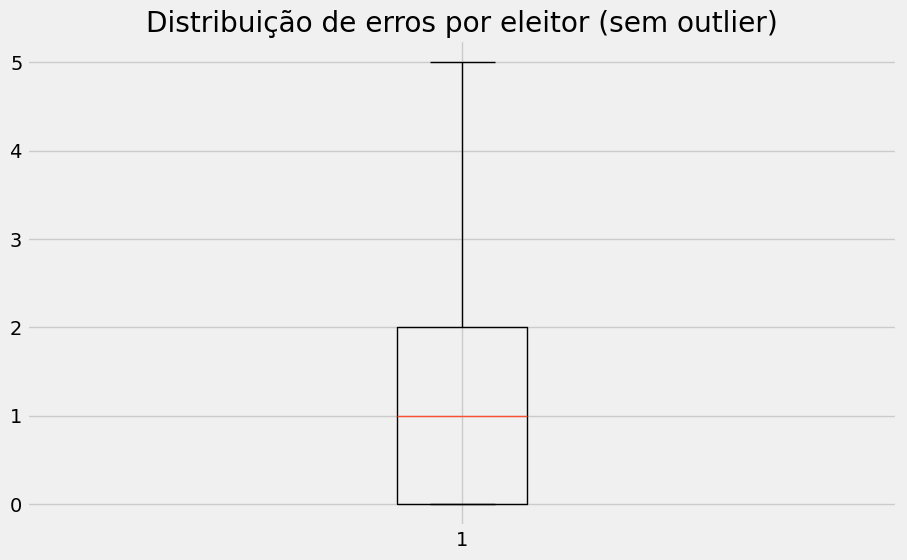

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the violin plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
plt.boxplot(erros["max_erros"],showfliers = False)
#plt.xlabel("Erros")
#plt.ylabel("Values")
plt.title("Distribuição de erros por eleitor (sem outlier)")
plt.grid(True)
plt.savefig('app/img/box_sem_outlier.jpg', format='jpg')
plt.show()


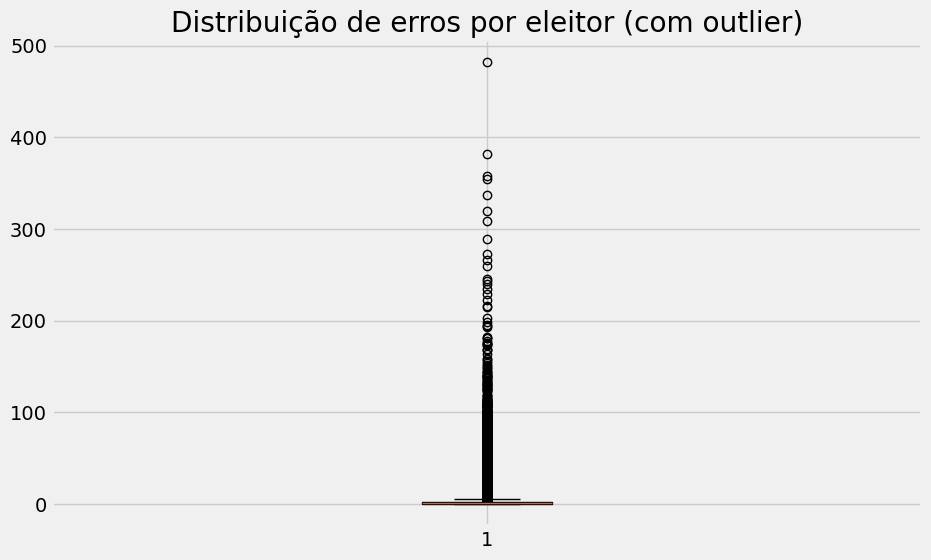

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
plt.boxplot(erros["max_erros"],showfliers = True)
#plt.xlabel("Erros")
#plt.ylabel("Values")
plt.title("Distribuição de erros por eleitor (com outlier)")
plt.grid(True)
plt.savefig('app/img/box_com_outlier.jpg', format='jpg')
plt.show()


In [9]:
#sc.stop()